In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",15)
pd.set_option("display.width",10000)

In [2]:
df=pd.read_csv("Churn_Modelling (1).csv")

df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          1    15634602  Hargrave          619    France  Female   42       2       0.00              1          1               1        101348.88       1
1          2    15647311      Hill          608     Spain  Female   41       1   83807.86              1          0               1        112542.58       0
2          3    15619304      Onio          502    France  Female   42       8  159660.80              3          1               0        113931.57       1
3          4    15701354      Boni          699    France  Female   39       1       0.00              2          0               0         93826.63       0
4          5    15737888  Mitchell          850     Spain  Female   43       2  125510.82              1          1               1         79084.10       0

In [3]:
df

RowNumber  CustomerId                  Surname  CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0             1    15634602                 Hargrave          619    France  Female   42       2       0.00              1          1               1        101348.88       1
1             2    15647311                     Hill          608     Spain  Female   41       1   83807.86              1          0               1        112542.58       0
2             3    15619304                     Onio          502    France  Female   42       8  159660.80              3          1               0        113931.57       1
3             4    15701354                     Boni          699    France  Female   39       1       0.00              2          0               0         93826.63       0
4             5    15737888                 Mitchell          850     Spain  Female   43       2  125510.82              1          1               1         79084.10       0
5             6    15574012                      Chu          645     Spain    Male   44       8  113755.78              2          1               0        149756.71       1
6             7    15592531                 Bartlett          822    France    Male   50       7       0.00              2          1               1         10062.80       0
7             8    15656148                   Obinna          376   Germany  Female   29       4  115046.74              4          1               0        119346.88       1
8             9    15792365                       He          501    France    Male   44       4  142051.07              2          0               1         74940.50       0
9            10    15592389                       H?          684    France    Male   27       2  134603.88              1          1               1         71725.73       0
10           11    15767821                   Bearce          528    France    Male   31       6  102016.72              2          0               0         80181.12       0
11           12    15737173                  Andrews          497     Spain    Male   24       3       0.00              2          1               0         76390.01       0
12           13    15632264                      Kay          476    France  Female   34      10       0.00              2          1               0         26260.98       0
13           14    15691483                     Chin          549    France  Female   25       5       0.00              2          0               0        190857.79       0
14           15    15600882                    Scott          635     Spain  Female   35       7       0.00              2          1               1         65951.65       0
15           16    15643966                  Goforth          616   Germany    Male   45       3  143129.41              2          0               1         64327.26       0
16           17    15737452                    Romeo          653   Germany    Male   58       1  132602.88              1          1               0          5097.67       1
17           18    15788218                Henderson          549     Spain  Female   24       9       0.00              2          1               1         14406.41       0
18           19    15661507                  Muldrow          587     Spain    Male   45       6       0.00              1          0               0        158684.81       0
19           20    15568982                      Hao          726    France  Female   24       6       0.00              2          1               1         54724.03       0
20           21    15577657                 McDonald          732    France    Male   41       8       0.00              2          1               1        170886.17       0
21           22    15597945                 Dellucci          636     Spain  Female   32       8       0.00              2          1               0       

In [4]:
df=df.iloc[:,3:]

In [5]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          619    France  Female   42       2       0.00              1          1               1        101348.88       1
1          608     Spain  Female   41       1   83807.86              1          0               1        112542.58       0
2          502    France  Female   42       8  159660.80              3          1               0        113931.57       1
3          699    France  Female   39       1       0.00              2          0               0         93826.63       0
4          850     Spain  Female   43       2  125510.82              1          1               1         79084.10       0

In [6]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df["Geography"]=df["Geography"].astype("category")
df["Geography"]=df["Geography"].cat.codes

In [9]:
df["Gender"]=df["Gender"].astype("category")
df["Gender"]=df["Gender"].cat.codes

In [10]:
df=pd.get_dummies(df,columns=["Geography"],dtype=int)

In [11]:
df=df.drop(columns=["Geography_0"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int8   
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  Geography_1      10000 non-null  int32  
 11  Geography_2      10000 non-null  int32  
dtypes: float64(2), int32(2), int64(7), int8(1)
memory usage: 791.1 KB


In [13]:
df.describe()

CreditScore        Gender           Age        Tenure        Balance  NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary        Exited   Geography_1   Geography_2
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000  10000.00000    10000.000000     10000.000000  10000.000000  10000.000000  10000.000000
mean     650.528800      0.545700     38.921800      5.012800   76485.889288       1.530200      0.70550        0.515100    100090.239881      0.203700      0.250900      0.247700
std       96.653299      0.497932     10.487806      2.892174   62397.405202       0.581654      0.45584        0.499797     57510.492818      0.402769      0.433553      0.431698
min      350.000000      0.000000     18.000000      0.000000       0.000000       1.000000      0.00000        0.000000        11.580000      0.000000      0.000000      0.000000
25%      584.000000      0.000000     32.000000      3.000000       0.000000       1.000000      0.00000        0.000000     51002.110000      0.000000      0.000000      0.000000
50%      652.000000      1.000000     37.000000      5.000000   97198.540000       1.000000      1.00000        1.000000    100193.915000      0.000000      0.000000      0.000000
75%      718.000000      1.000000     44.000000      7.000000  127644.240000       2.000000      1.00000        1.000000    149388.247500      0.000000      1.000000      0.000000
max      850.000000      1.000000     92.000000     10.000000  250898.090000       4.000000      1.00000        1.000000    199992.480000      1.000000      1.000000      1.000000

In [14]:
for i in df.columns:
    print("***************************",i,
         "*********************************")
    print()
    print(set(df[i].tolist()))

*************************** CreditScore *********************************

{350, 351, 358, 359, 363, 365, 367, 373, 376, 382, 383, 386, 395, 399, 401, 404, 405, 407, 408, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575,

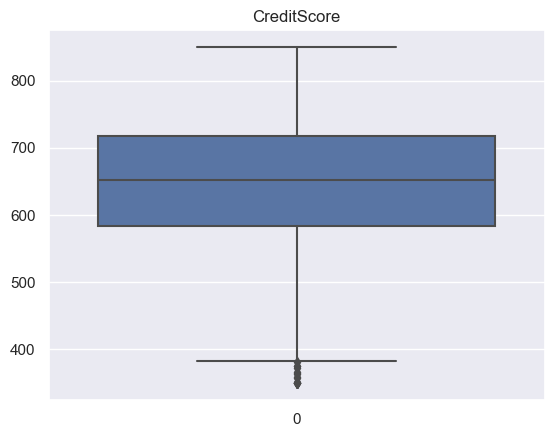

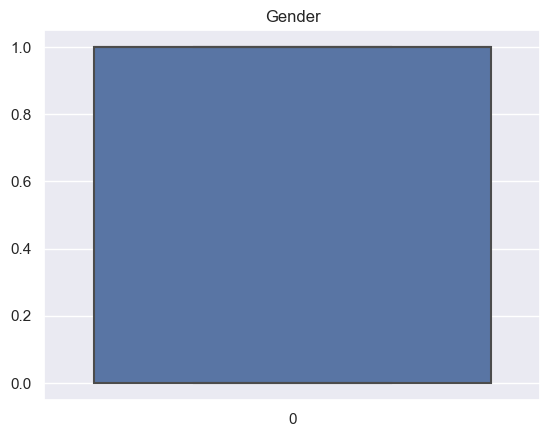

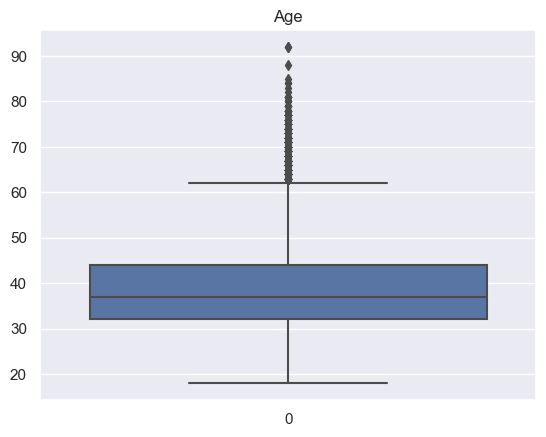

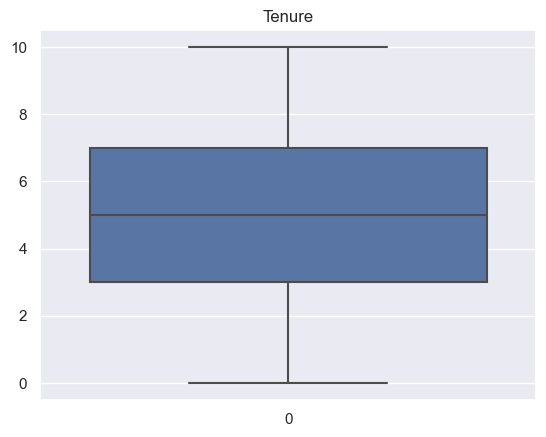

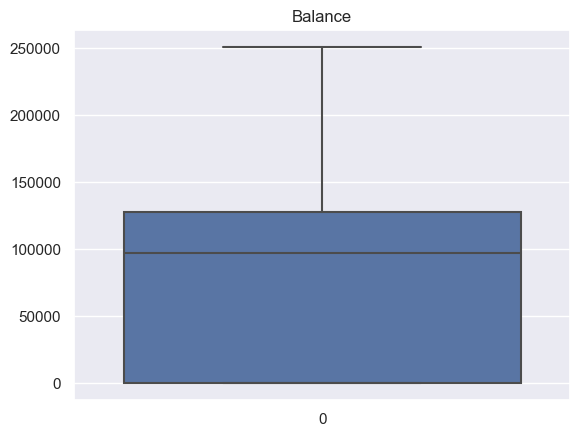

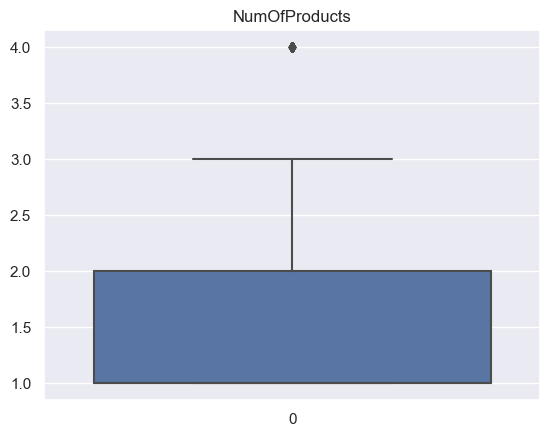

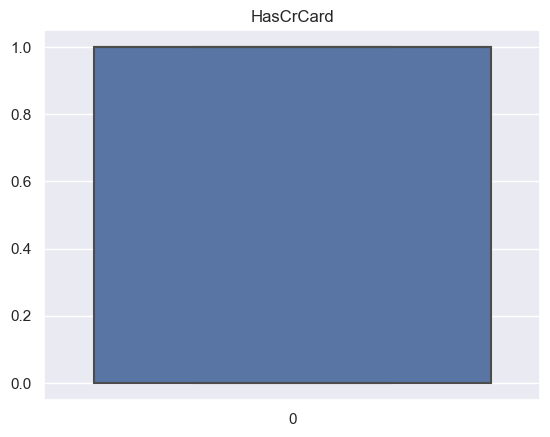

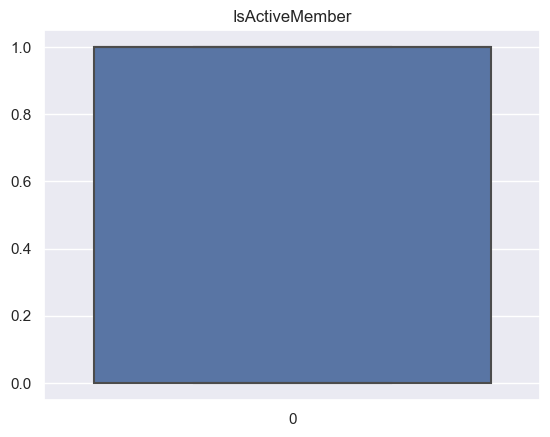

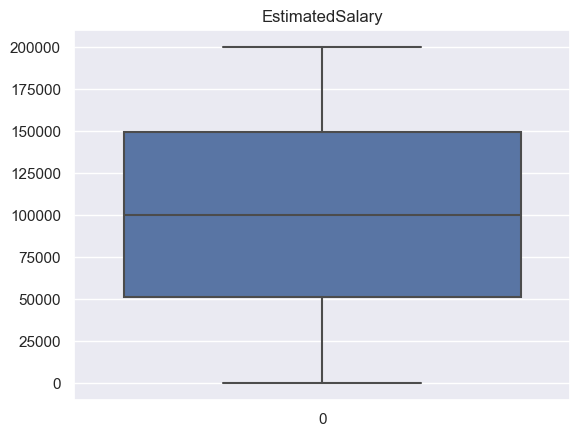

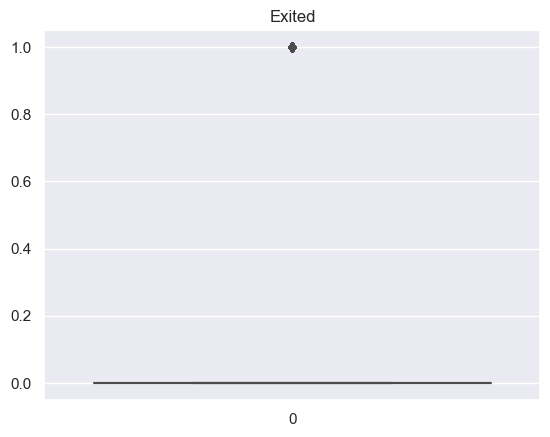

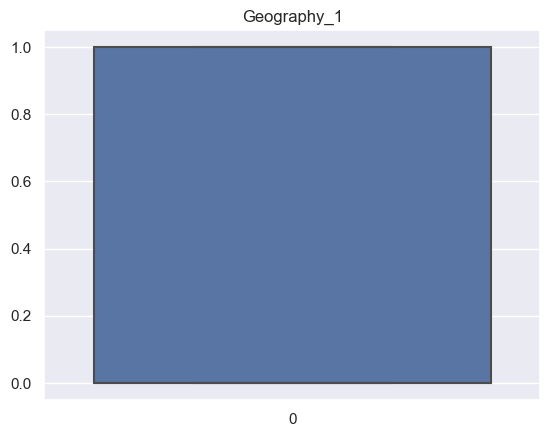

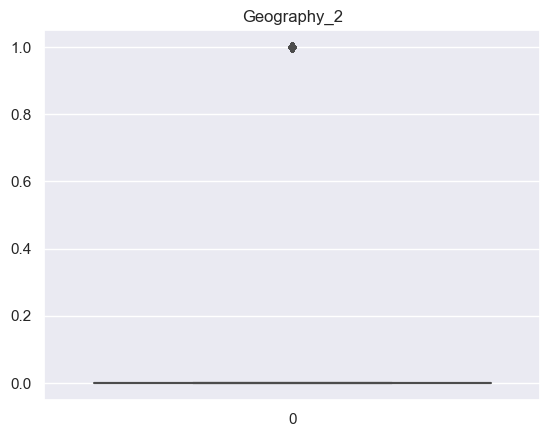

In [15]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.title(f"{col}")
    plt.show()
for i in list(df.select_dtypes(exclude=["object"]).columns)[0:]:
    boxplots(i)

In [16]:
x=df.drop(columns=["Exited"])
y=df[["Exited"]]

In [18]:
x.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_1  Geography_2
0          619       0   42       2       0.00              1          1               1        101348.88            0            0
1          608       0   41       1   83807.86              1          0               1        112542.58            0            1
2          502       0   42       8  159660.80              3          1               0        113931.57            0            0
3          699       0   39       1       0.00              2          0               0         93826.63            0            0
4          850       0   43       2  125510.82              1          1               1         79084.10            0            1

In [19]:
y.head()

Exited
0       1
1       0
2       1
3       0
4       0

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
pd.DataFrame(x1).head()

0         1         2         3         4         5         6         7         8         9         10
0 -0.326221 -1.095988  0.293517 -1.041760 -1.225848 -0.911583  0.646092  0.970243  0.021886 -0.578736 -0.573809
1 -0.440036 -1.095988  0.198164 -1.387538  0.117350 -0.911583 -1.547768  0.970243  0.216534 -0.578736  1.742740
2 -1.536794 -1.095988  0.293517  1.032908  1.333053  2.527057  0.646092 -1.030670  0.240687 -0.578736 -0.573809
3  0.501521 -1.095988  0.007457 -1.387538 -1.225848  0.807737 -1.547768 -1.030670 -0.108918 -0.578736 -0.573809
4  2.063884 -1.095988  0.388871 -1.041760  0.785728 -0.911583  0.646092  0.970243 -0.365276 -0.578736  1.742740

In [22]:
y.value_counts()

Exited
0         7963
1         2037
Name: count, dtype: int64

In [23]:
from imblearn.over_sampling import RandomOverSampler
RO=RandomOverSampler()
x_over,y_over=RO.fit_resample(x1,y)

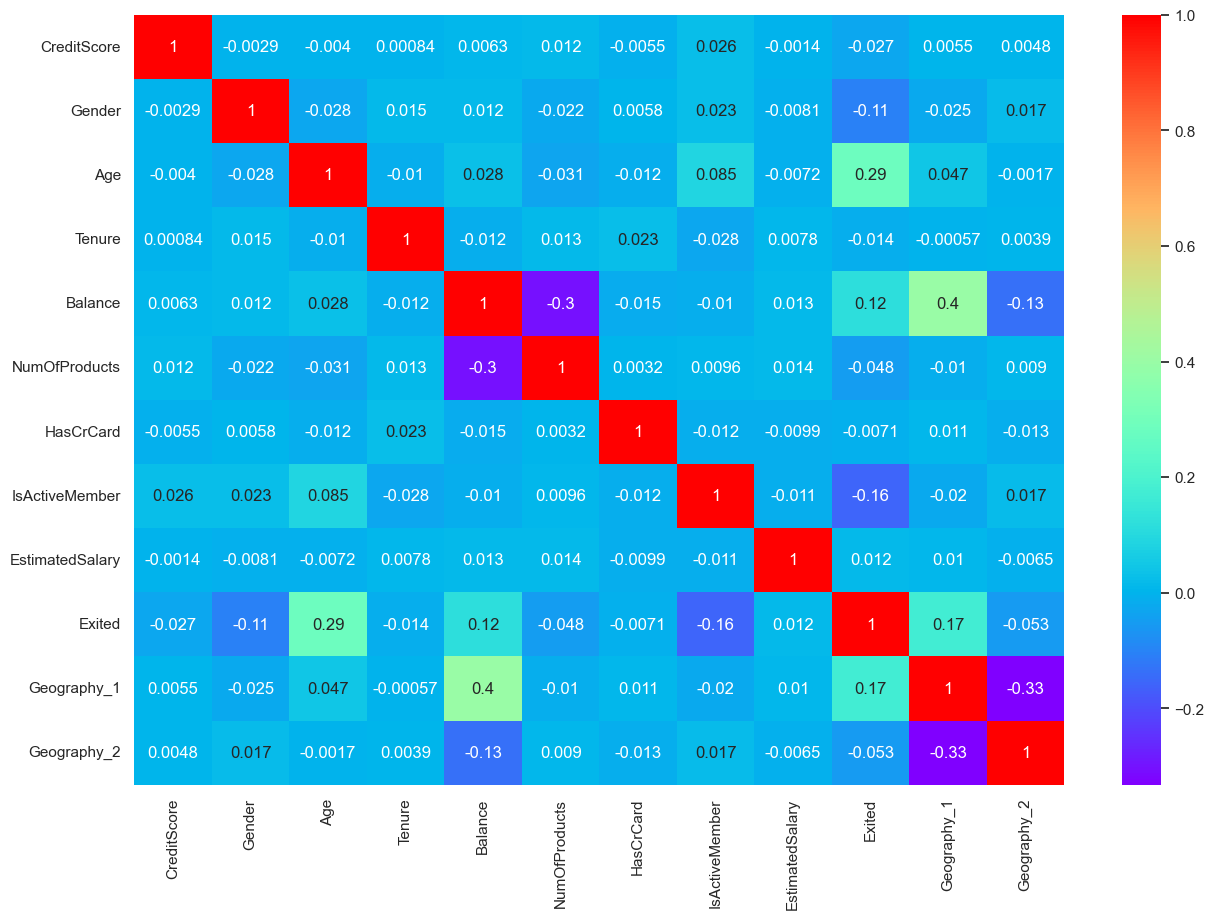

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")
plt.show()

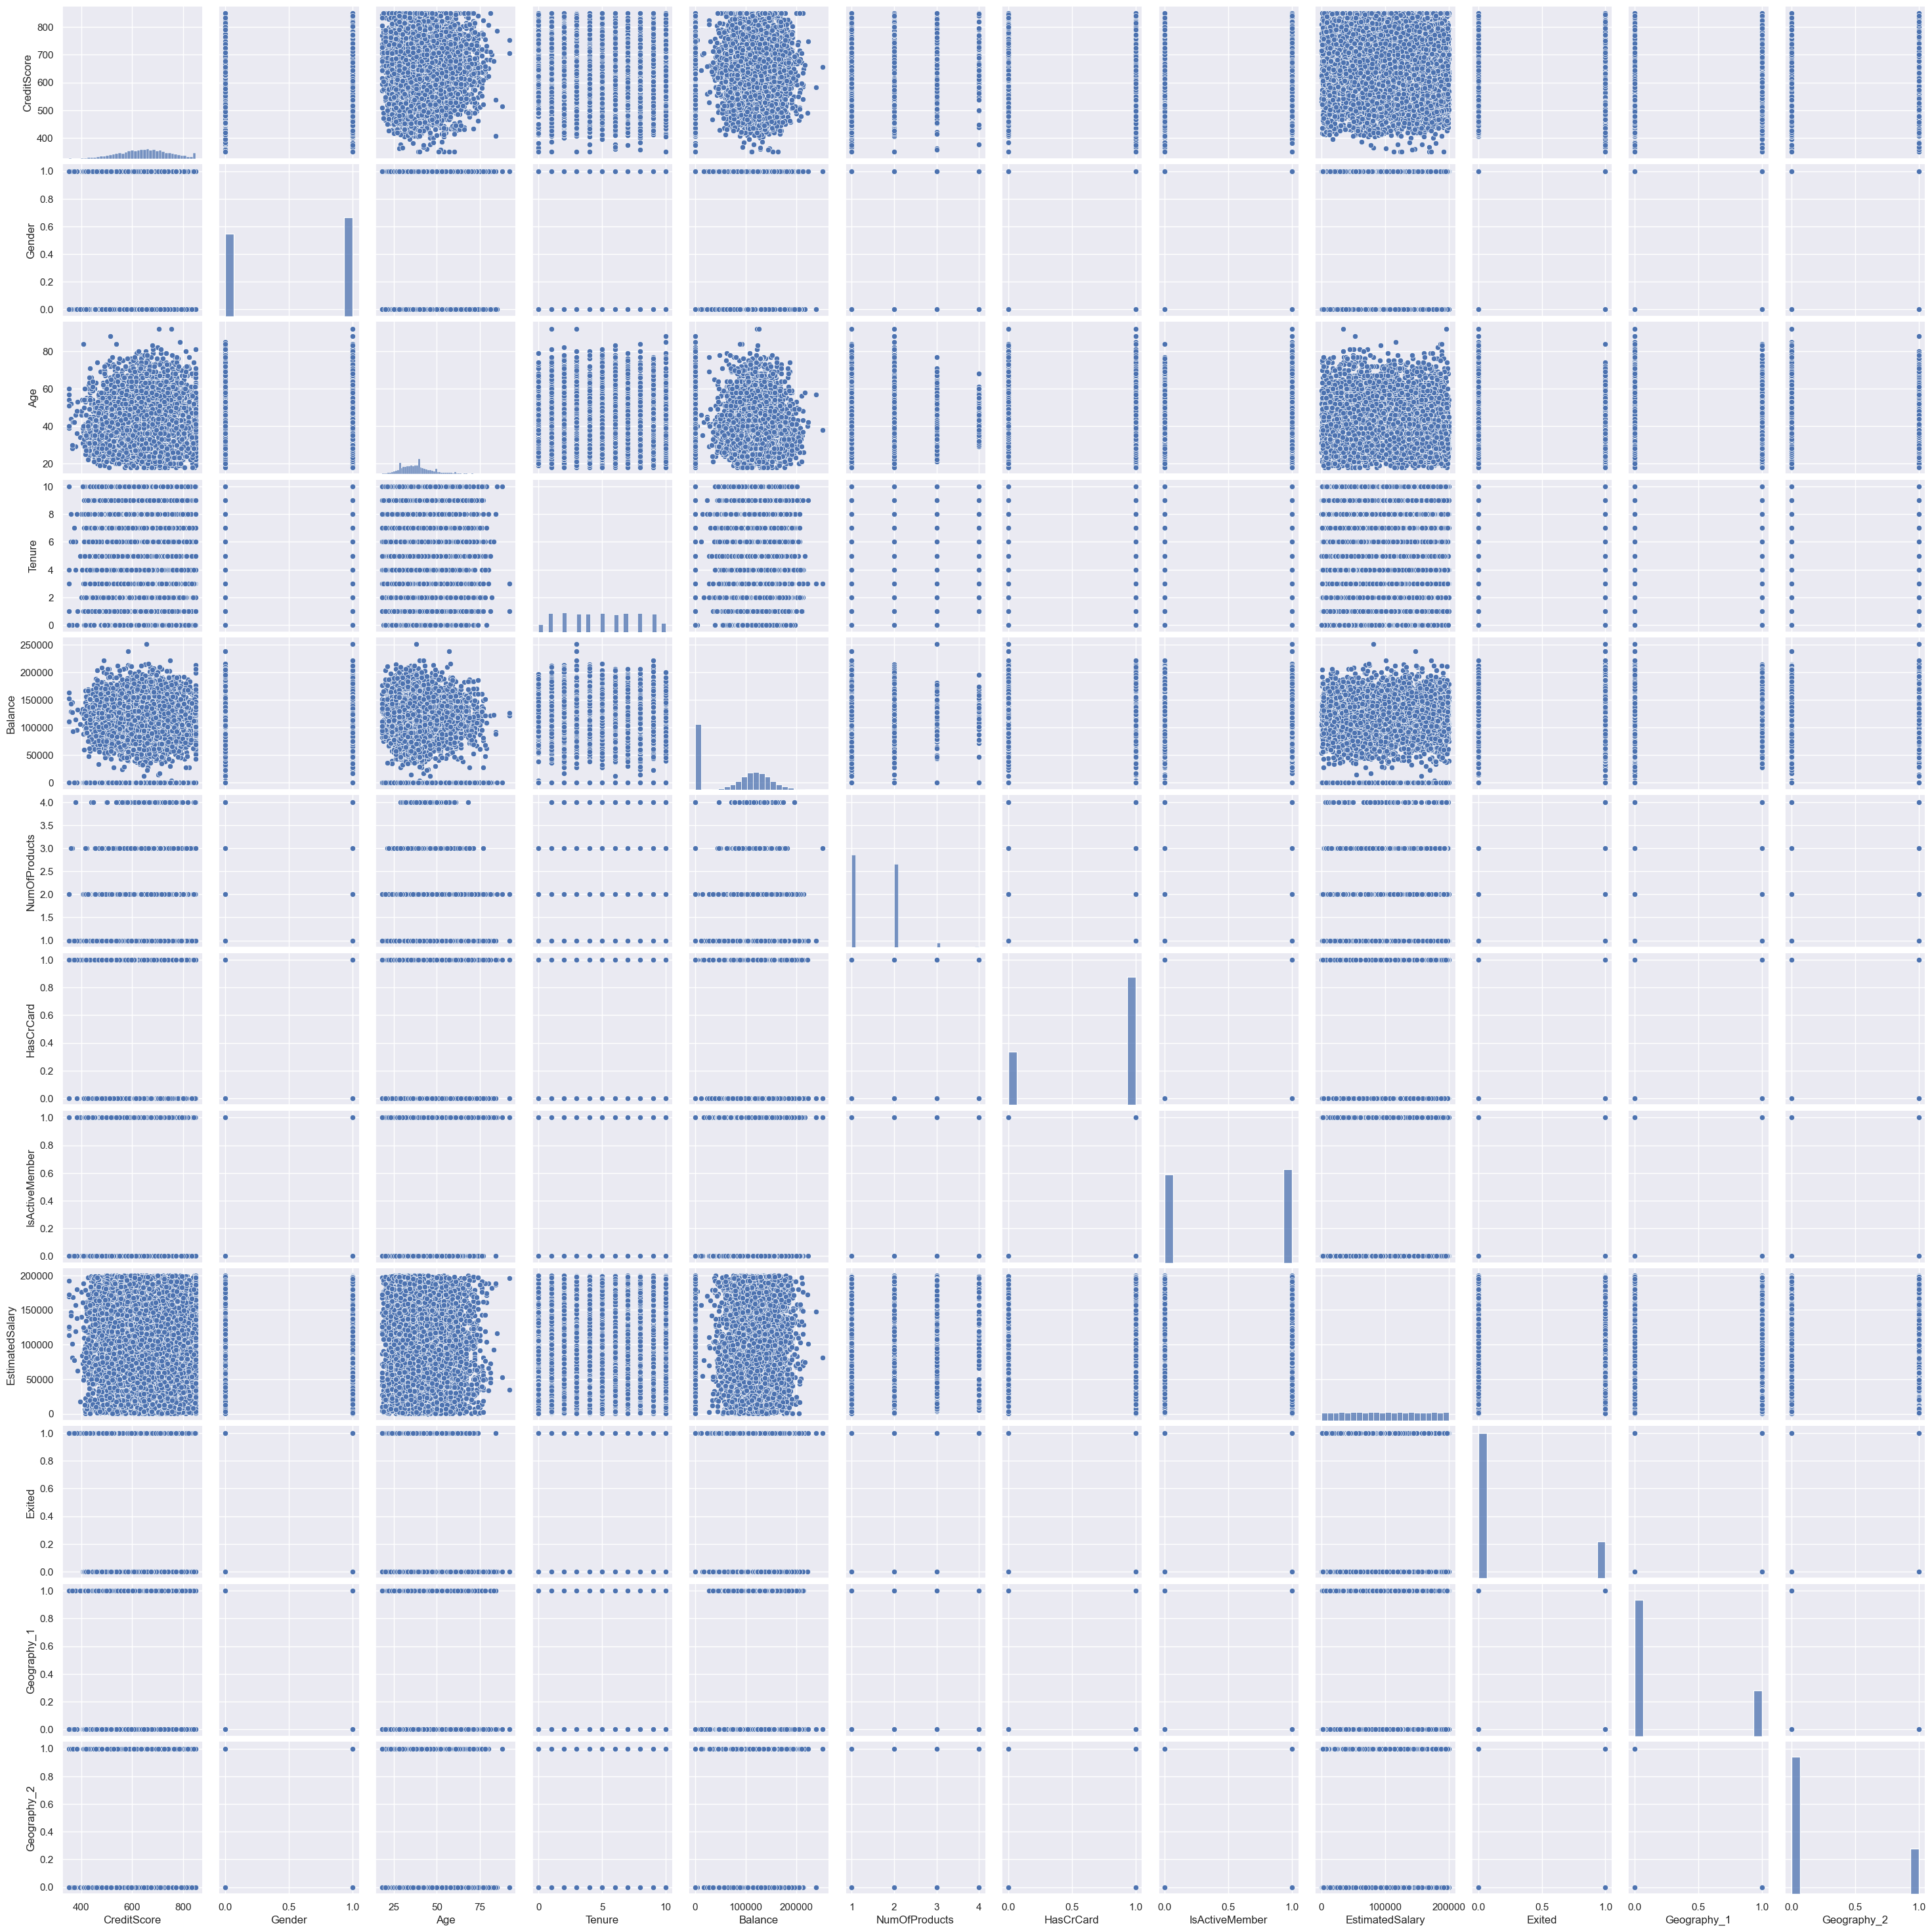

In [25]:
sns.pairplot(df)

In [26]:
!pip install dtale

  Obtaining dependency information for dtale from https://files.pythonhosted.org/packages/44/26/cf856749f090e003ae364fbb0110d21d81c23bafc50b8c1b4d5423219bb5/dtale-3.12.0-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/62.3 kB ? eta -:--:--
     ------ --------------------------------- 10.2/62.3 kB ? eta -:--:--
     ------------------------------- ------ 51.2/62.3 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 62.3/62.3 kB 554.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/642.7 kB ? eta -:--:--
     --- ----------------------------------- 51.2/642.7 kB 2.6 MB/s eta 0:00:01
     ------------ ------------------------- 215.0/642.7 kB 2.6 MB/s eta 0:00:01
     ----------------------- -------------- 399.4/642.7 kB 3.1 MB/s eta 0:00:01
     ------------------------------------ - 614.4/642.7 kB 3.5 MB/s eta 0:00:01


In [28]:
import dtale
import dtale.app as dtale_app

In [29]:
dtale.show(df)

2024-05-18 02:27:26,833 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:26,851 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:26,856 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:26,859 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:26,860 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:26,862 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:26,864 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:26,866 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:26,867 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:26,871 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:26,875 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:26,877 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:26,879 - WA

2024-05-18 02:27:34,170 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:34,173 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:34,176 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:34,178 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:34,180 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:34,183 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:34,184 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:34,186 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:34,187 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:34,191 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:34,193 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:34,194 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:34,197 - WA

2024-05-18 02:27:38,008 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:38,010 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-18 02:27:38,011 - WARNING  - findfont: Font family 'Heiti TC' not found.


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.25,random_state=101,stratify=y_over)

In [32]:
#building bagging method
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier()
bag.fit(x_train,y_train)

BaggingClassifier()

In [33]:
y_pred_train_bag=bag.predict(x_train)
y_pred_test_bag=bag.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [35]:
print(accuracy_score(y_pred_train_bag,y_train))
print("****************************")
print(accuracy_score(y_pred_test_bag,y_test))

0.99715338245144
****************************
0.930939226519337


In [36]:
print(classification_report(y_pred_train_bag,y_train))
print("****************************")
print(classification_report(y_pred_test_bag,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5970
           1       1.00      1.00      1.00      5974

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944

****************************
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1860
           1       0.96      0.90      0.93      2122

    accuracy                           0.93      3982
   macro avg       0.93      0.93      0.93      3982
weighted avg       0.93      0.93      0.93      3982



In [37]:
print(confusion_matrix(y_pred_train_bag,y_train))
print("****************************")
print(confusion_matrix(y_pred_test_bag,y_test))

[[5954   16]
 [  18 5956]]
****************************
[[1788   72]
 [ 203 1919]]


In [44]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_estimators=200,criterion="entropy",bootstrap=True,oob_score=False)
rc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
#numericdata-entropy
#categorical data- ginni

In [45]:
y_pred_train_rc=rc.predict(x_train)
y_pred_test_rc=rc.predict(x_test)

In [46]:
print(accuracy_score(y_pred_train_rc,y_train))
print("****************************")
print(accuracy_score(y_pred_test_rc,y_test))

1.0
****************************
0.9460070316423907


In [47]:
print(classification_report(y_pred_train_rc,y_train))
print("****************************")
print(classification_report(y_pred_test_rc,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944

****************************
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1870
           1       0.98      0.92      0.95      2112

    accuracy                           0.95      3982
   macro avg       0.95      0.95      0.95      3982
weighted avg       0.95      0.95      0.95      3982



In [48]:
print(confusion_matrix(y_pred_train_rc,y_train))
print("****************************")
print(confusion_matrix(y_pred_test_rc,y_test))

[[5972    0]
 [   0 5972]]
****************************
[[1823   47]
 [ 168 1944]]


In [49]:
from sklearn.model_selection import cross_val_score
training_accuracy=cross_val_score(rc,x_train,y_train,cv=10)
print(training_accuracy.mean())

0.9386289186518366


In [50]:
testing_accuracy=cross_val_score(rc,x_test,y_test,cv=10)
print(testing_accuracy.mean())

0.847820556416166
